In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
d = pd.read_csv("diabetes.csv")

## Understand data :-

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Pregnancies  : Number of times pregnant
#Glucose      : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#BloodPressure: Diastolic blood pressure (mm Hg)
#SkinThickness: Triceps skin fold thickness (mm)
#Insulin      : 2-Hour serum insulin (mu U/ml)
#BMI          : Body mass index (weight in kg/(height in m)^2)
#DiabetesPedigreeFunction:  Diabetes pedigree function
#Age          : Age (years)
#Outcome      : Class variable (0 or 1)

#According Data our target is Outcome

In [4]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Missing Value:-

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Identification of variables and data types:-

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Correlation between features through visualization:-

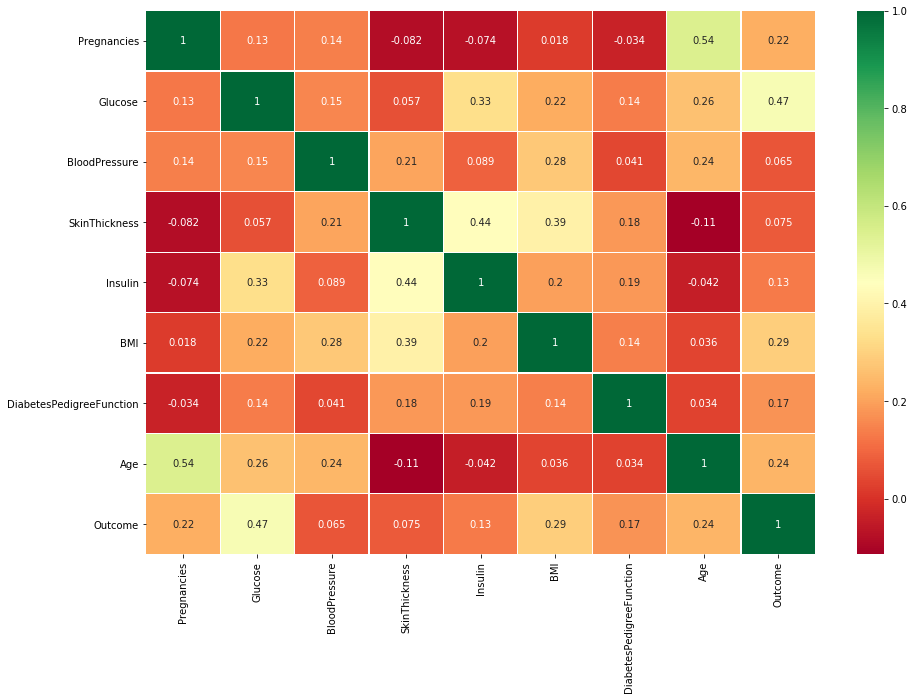

In [7]:
df.corr()
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

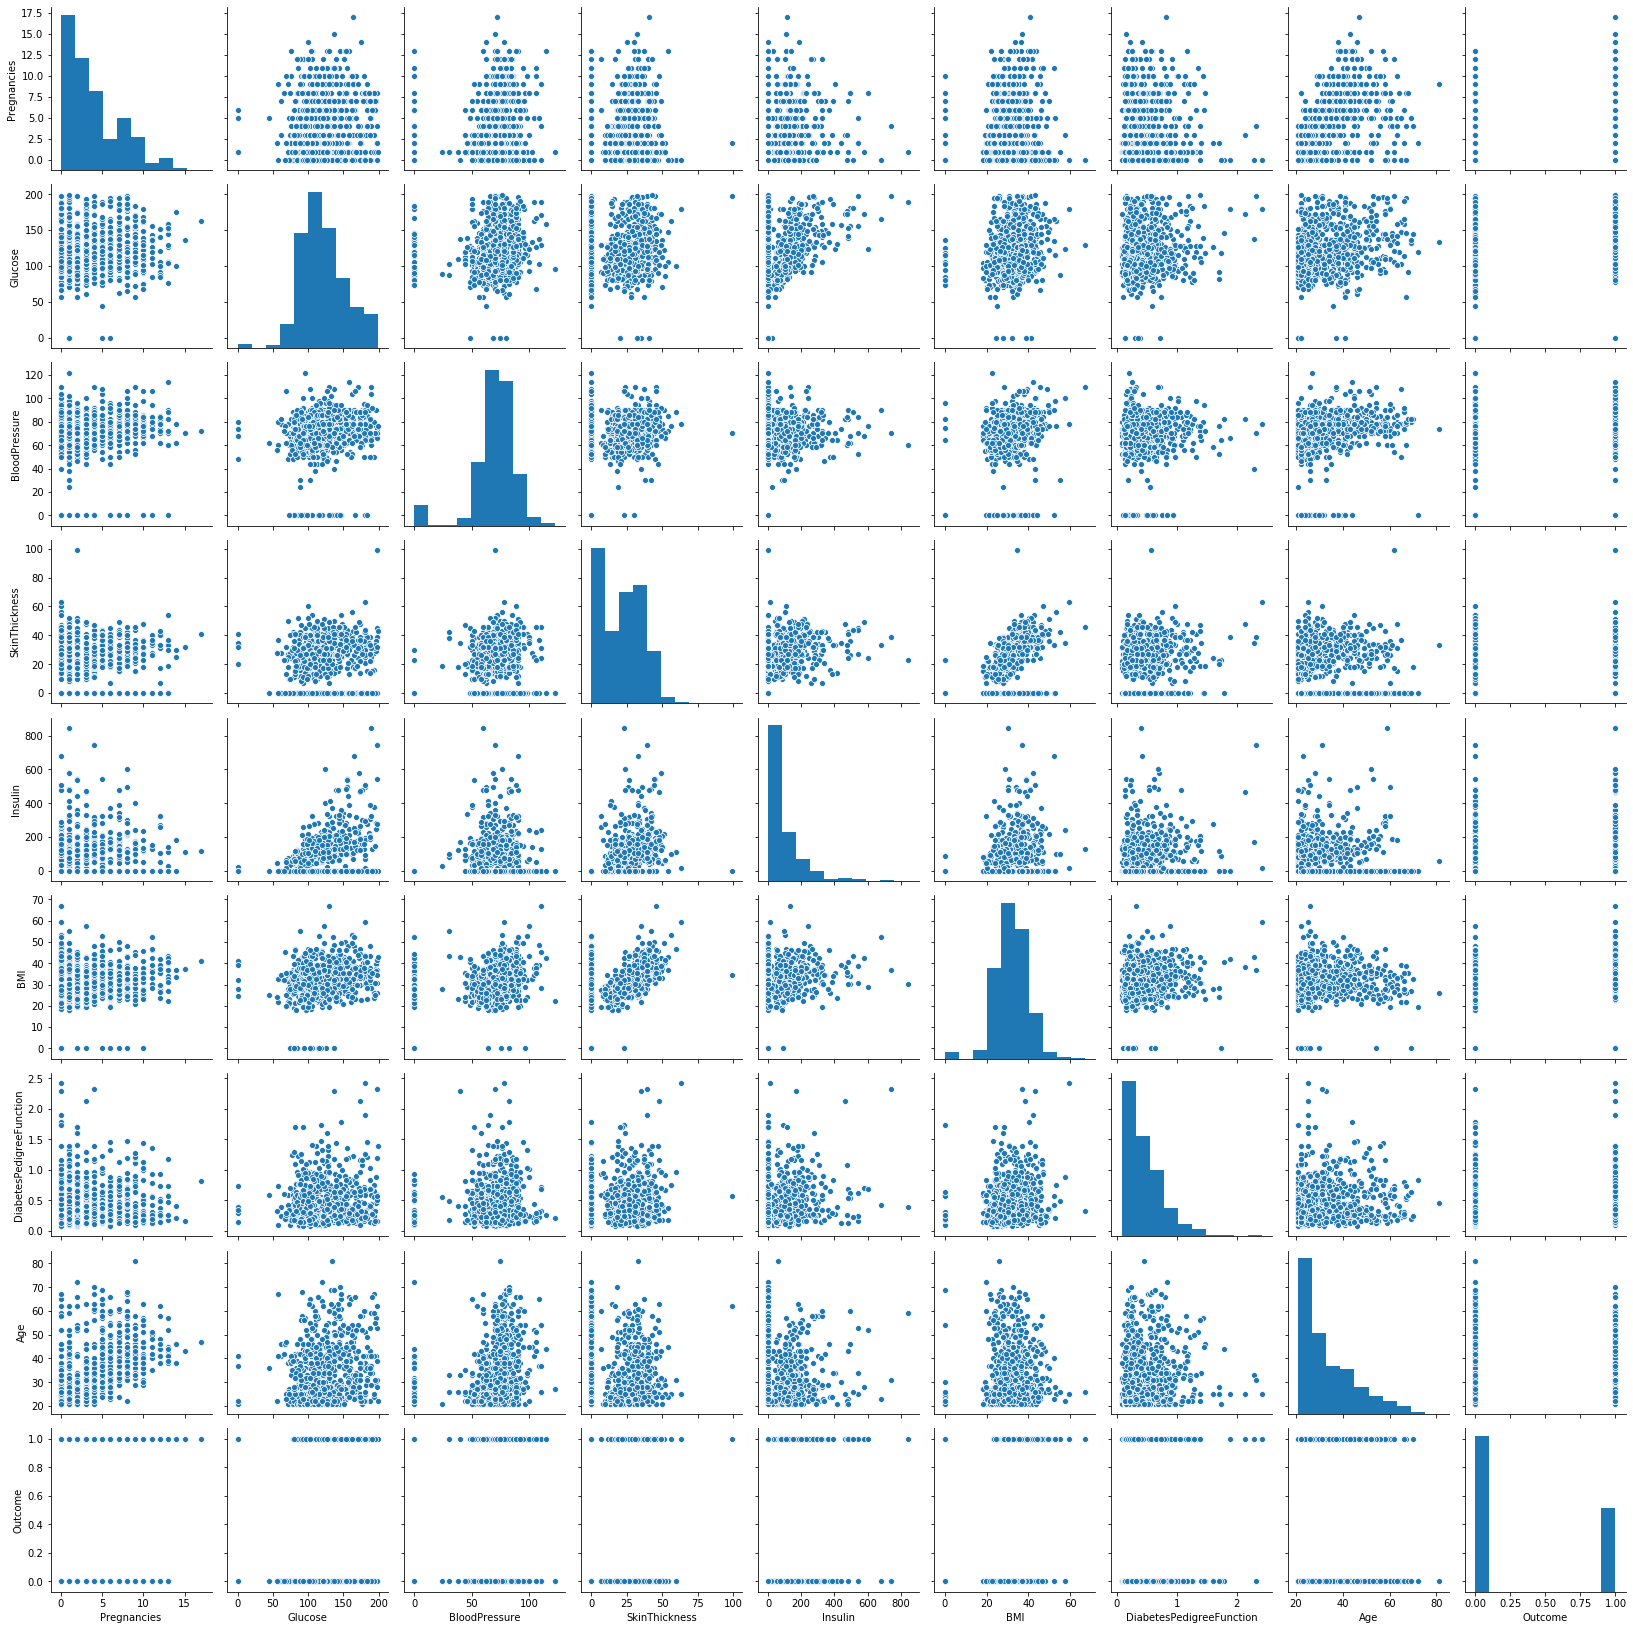

In [8]:
sns.pairplot(df)
plt.show()

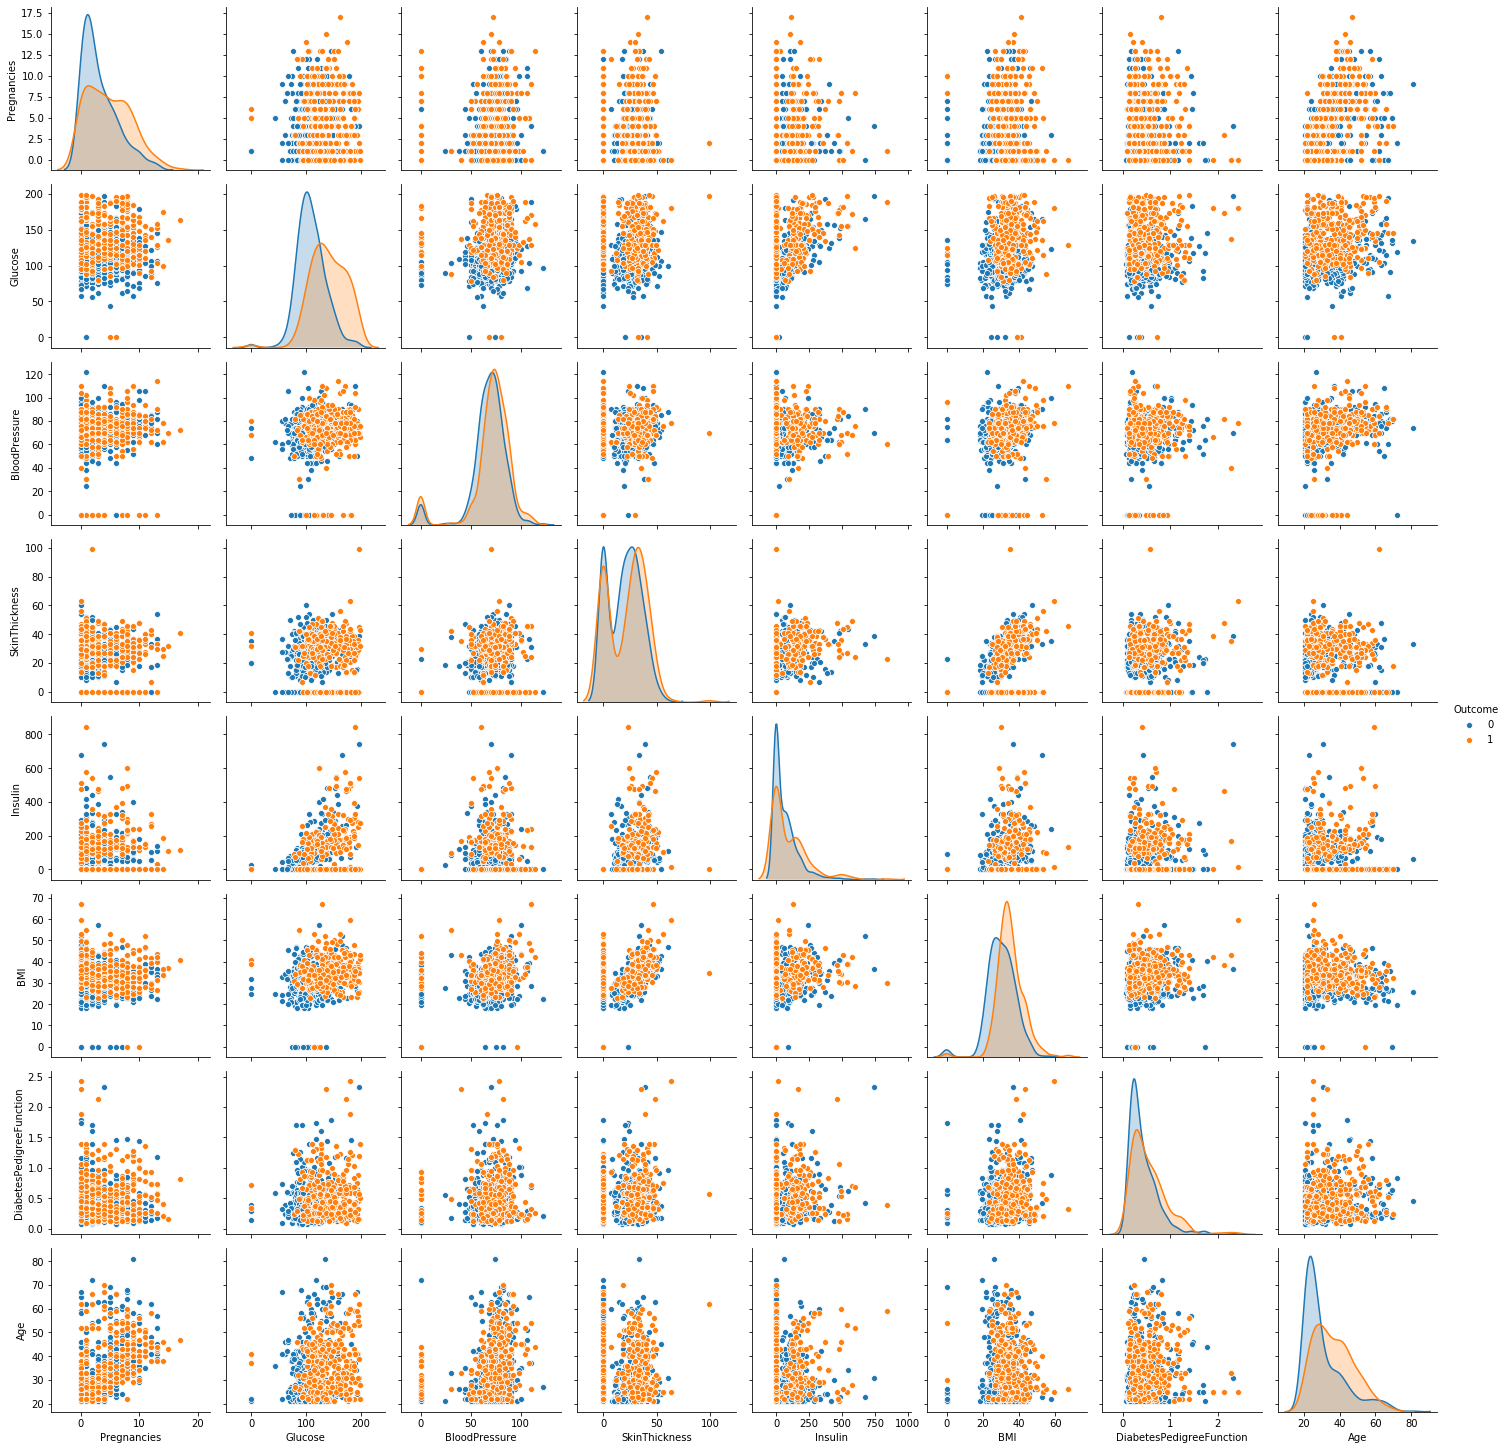

In [9]:
sns.pairplot(df,hue = 'Outcome')
plt.show()

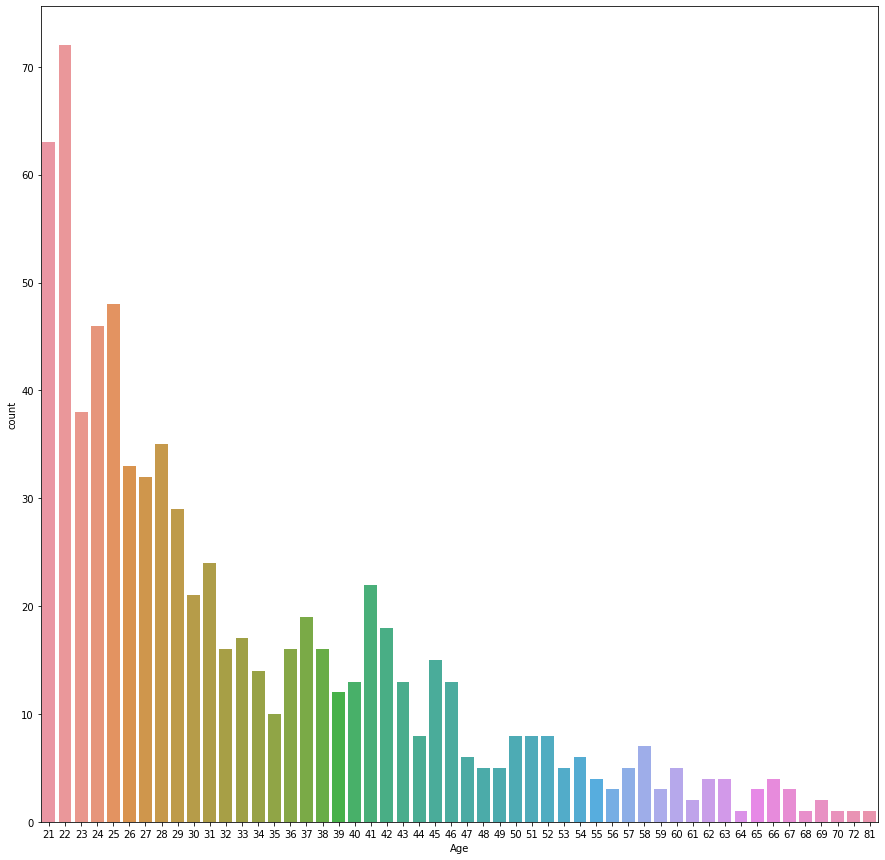

In [10]:
plt.figure(figsize=(15,15))
sns.set_palette("RdBu")
sns.countplot(x="Age", data=df)
plt.show()

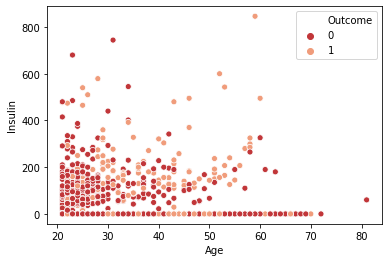

In [11]:
sns.scatterplot(x="Age", y="Insulin",data=df, hue="Outcome")
plt.show()

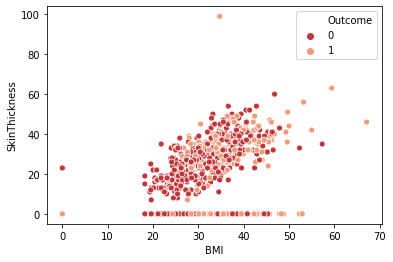

In [12]:
sns.scatterplot(x="BMI", y="SkinThickness",data=df, hue="Outcome")
plt.show()

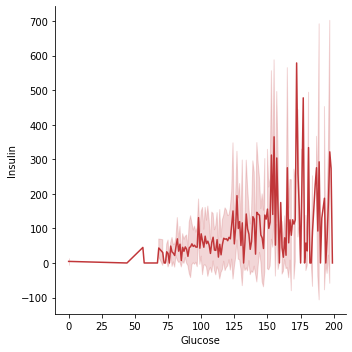

In [13]:
sns.relplot(x="Glucose", y="Insulin", data=df, kind="line", ci="sd", markers=True, dashes=True)
plt.show()

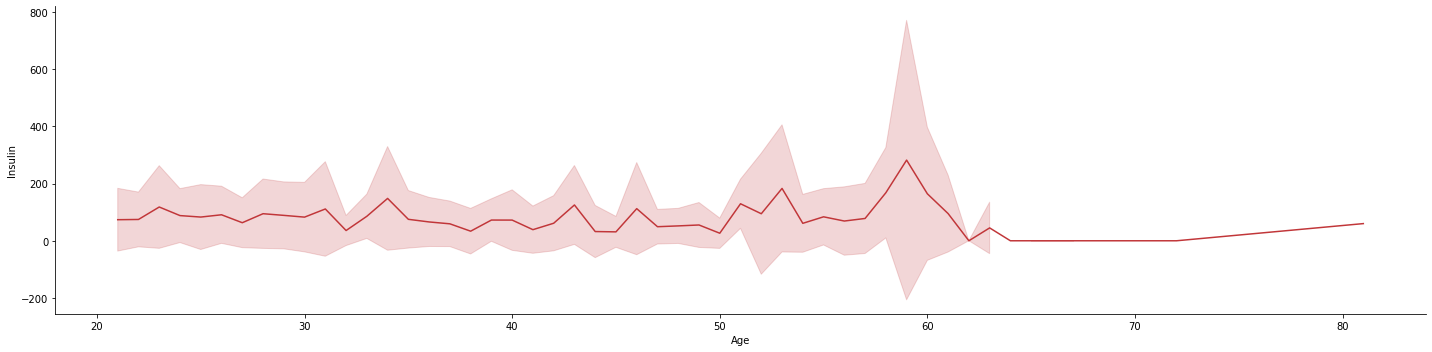

In [14]:
sns.relplot(x="Age", y="Insulin", data=df, kind="line", aspect=4, ci="sd")
plt.show()

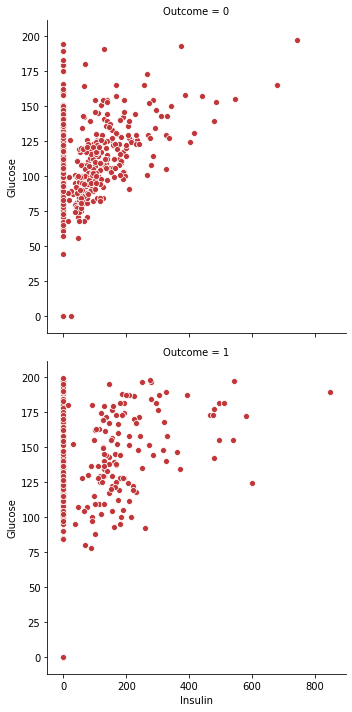

In [15]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", row="Outcome")
plt.show()

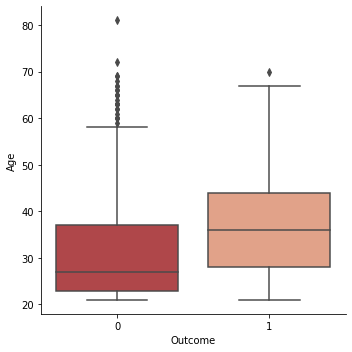

In [16]:
sns.catplot(x="Outcome",y="Age",data=df, kind="box")
plt.show()

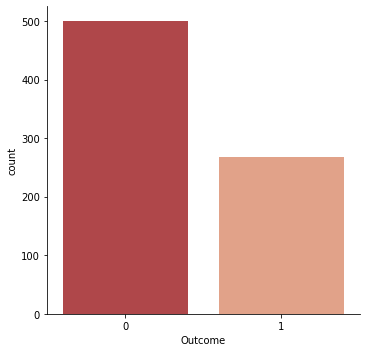

In [17]:
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()


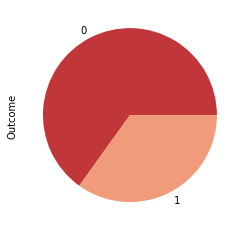

In [18]:
df["Outcome"].value_counts().plot(kind="pie")
plt.show()

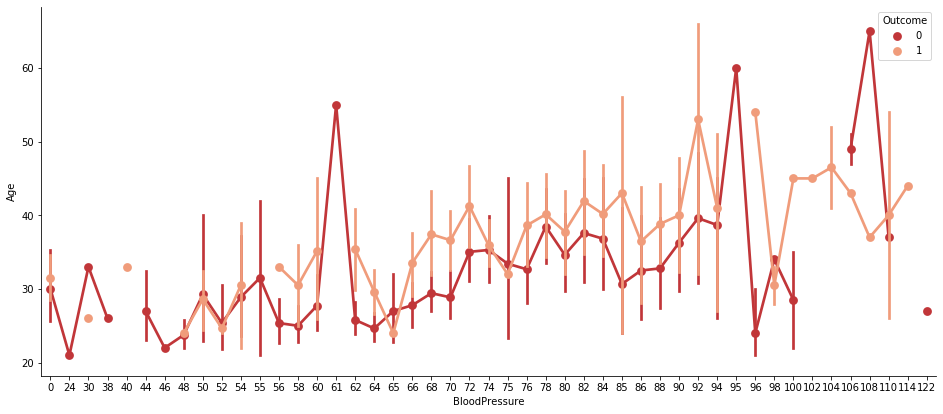

In [19]:
g=sns.catplot('BloodPressure','Age',data=df,hue='Outcome',kind='point',legend_out=False)
g.fig.set_size_inches(15,6)

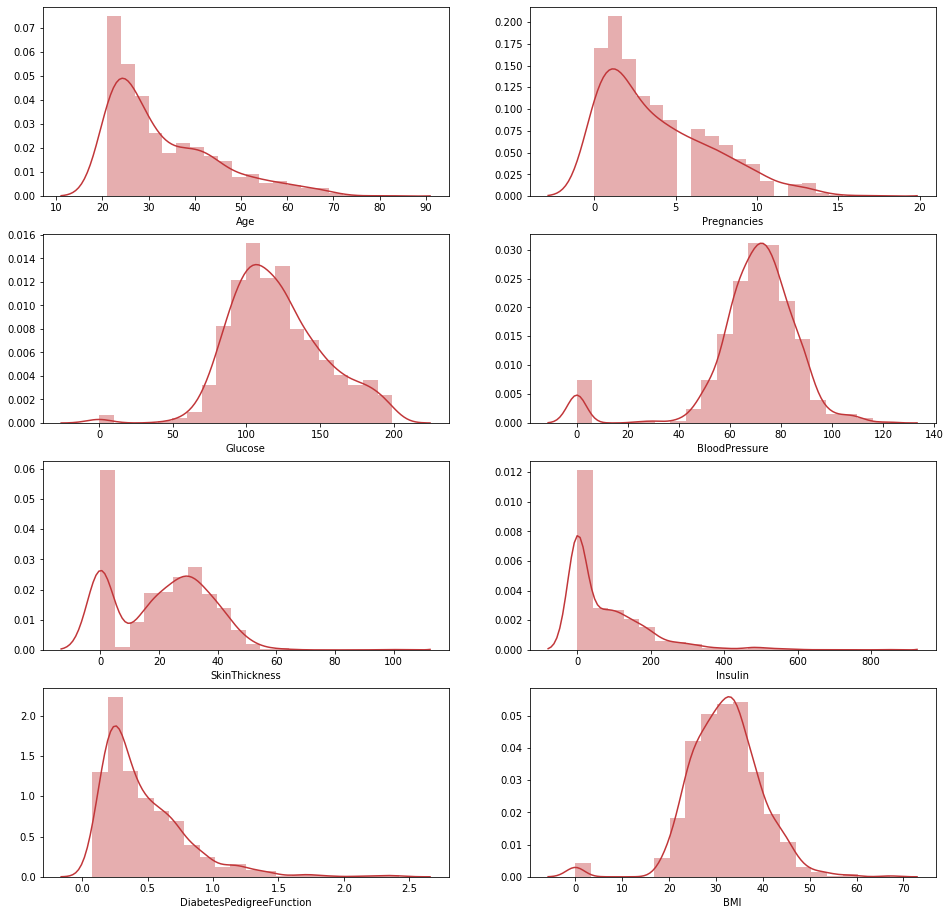

In [20]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Naive aggregation

In [23]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

In [24]:
model_list = [('lr',lr),('dt1',dt1),('dt2',dt2)]

In [25]:
from sklearn.ensemble import VotingClassifier

In [26]:
# Hard voting
vc1 =  VotingClassifier(estimators=model_list)

In [27]:
vc1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini'...
                              DecisionTr

In [28]:
y_pred = vc1.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       146
           1       0.71      0.56      0.63        85

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [30]:
# Soft voting
vc2 =  VotingClassifier(estimators=model_list,voting="soft")

In [31]:
vc2.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini'...
                              DecisionTr

In [32]:
y_pred = vc2.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       146
           1       0.69      0.59      0.64        85

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



## Bootstrap Aggregation (Bagging)

In [34]:
from sklearn.ensemble import BaggingClassifier

In [35]:
lr = LogisticRegression()

In [36]:
bc1 = BaggingClassifier(lr, n_estimators=9,random_state=1)

In [37]:
bc1.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=9, n_jobs=None, oob_score=False,
                  random_state=1, ver

In [38]:
y_pred = bc1.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.59      0.67        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



## pasting

In [40]:
lr = LogisticRegression()

In [41]:
bc2 = BaggingClassifier(lr, n_estimators=9,random_state=1,bootstrap=False)

In [42]:
bc2.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=9, n_jobs=None, oob_score=False,
                  random_state=1, ve

In [43]:
y_pred = bc2.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



## Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf1 = RandomForestClassifier(n_estimators=11)

In [47]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_pred = rf1.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       146
           1       0.72      0.60      0.65        85

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       146
           1       0.72      0.60      0.65        85

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



## Pruning using maxfeature

In [51]:
rf2 = RandomForestClassifier(n_estimators=11,max_features=8,random_state=1)

In [52]:
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [53]:
y_pred = rf2.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       146
           1       0.69      0.61      0.65        85

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.76      0.75       231



## Stacking

In [55]:
from mlxtend.classifier import StackingClassifier

In [56]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

In [57]:
model_list = [lr,dt1,dt2]

In [58]:
meta_lr = LogisticRegression()

In [59]:
sc = StackingClassifier(classifiers=model_list, meta_classifier=meta_lr)

In [60]:
sc.fit(X_train,y_train)

StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                      

In [61]:
y_pred = sc.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       146
           1       0.68      0.55      0.61        85

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



In [63]:
sc.meta_clf_.coef_

array([[0.71229784, 4.01885897, 4.01885897]])

In [64]:
sc2 = StackingClassifier(classifiers=model_list, meta_classifier=DecisionTreeClassifier())

In [65]:
sc2.fit(X_train,y_train)

StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                      

In [66]:
y_pred = sc2.predict(X_test)

In [67]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       156
           1       0.52      0.59      0.55        75

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.66       231
weighted avg       0.70      0.69      0.69       231



In [68]:
print(sc2.meta_clf_.feature_importances_)

[0. 1. 0.]
